In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
mean_bert_scores = pd.read_csv('/home/yoni/PycharmProjects/grouped_sampling/evaluation/tables/third_part/mean.csv')
median_bert_scores = pd.read_csv('/home/yoni/PycharmProjects/grouped_sampling/evaluation/tables/third_part/median.csv')
max_bert_scores = pd.read_csv('/home/yoni/PycharmProjects/grouped_sampling/evaluation/tables/third_part/max.csv')
min_bert_scores = pd.read_csv('/home/yoni/PycharmProjects/grouped_sampling/evaluation/tables/third_part/min.csv')
standard_deviation_bert_scores = pd.read_csv('/home/yoni/PycharmProjects/grouped_sampling/evaluation/tables/third_part/standard_deviation.csv')
twenty_five_percentile_bert_scores = pd.read_csv('/home/yoni/PycharmProjects/grouped_sampling/evaluation/tables/third_part/25_percentile.csv')
seventy_five_percentile_bert_scores = pd.read_csv('/home/yoni/PycharmProjects/grouped_sampling/evaluation/tables/third_part/75_percentile.csv')

In [3]:
mean_bert_scores.rename({"BERT_f1": "mean BERT f1", "BERT_precision": "mean BERT precision", "BERT_recall": "mean BERT recall"}, axis=1, inplace=True)
median_bert_scores.rename({"BERT_f1": "median BERT f1", "BERT_precision": "median BERT precision", "BERT_recall": "median BERT recall"}, axis=1, inplace=True)
max_bert_scores.rename({"BERT_f1": "maximum BERT f1", "BERT_precision": "maximum BERT precision", "BERT_recall": "maximum BERT recall"}, axis=1, inplace=True)
min_bert_scores.rename({"BERT_f1": "minimum BERT f1", "BERT_precision": "minimum BERT precision", "BERT_recall": "minimum BERT recall"}, axis=1, inplace=True)
standard_deviation_bert_scores.rename({"BERT_f1": "standard deviation BERT f1", "BERT_precision": "standard deviation BERT precision", "BERT_recall": "standard deviation BERT_recall"}, axis=1, inplace=True)
twenty_five_percentile_bert_scores.rename({"BERT_f1": "25 percentile BERT f1", "BERT_precision": "25 percentile BERT precision", "BERT_recall": "25 percentile BERT recall"}, axis=1, inplace=True)
seventy_five_percentile_bert_scores.rename({"BERT_f1": "75 percentile BERT f1", "BERT_precision": "75 percentile BERT precision", "BERT_recall": "75 percentile BERT recall"}, axis=1, inplace=True)

<AxesSubplot: >

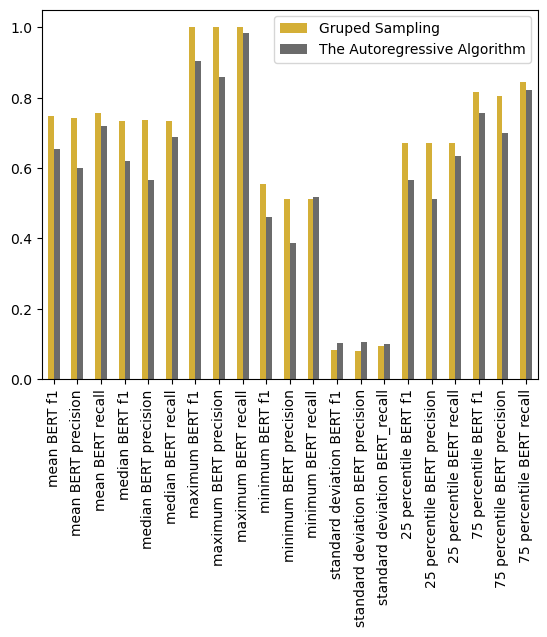

In [4]:
all_bert_scores = pd.concat([mean_bert_scores, median_bert_scores, max_bert_scores, min_bert_scores, standard_deviation_bert_scores, twenty_five_percentile_bert_scores, seventy_five_percentile_bert_scores], axis=1)
grouped_sampling_scores = all_bert_scores.iloc[-1, :].drop("group_size")
autoregressive_scores = all_bert_scores.iloc[0, 1:].drop("group_size")
grouped_sampling_auto_regressive_scores_with_names = pd.concat([grouped_sampling_scores, autoregressive_scores], axis=1, keys=["Gruped Sampling", "The Autoregressive Algorithm"])
grouped_sampling_auto_regressive_scores_with_names.plot.bar(
    color=["#D4AF37", "#6B6B6B"]
)

In [5]:
grouped_sampling_auto_regressive_mean = grouped_sampling_auto_regressive_scores_with_names.iloc[0:3, :]
grouped_sampling_auto_regressive_mean

,Gruped Sampling,The Autoregressive Algorithm
mean BERT f1,0.747,0.653
mean BERT precision,0.741,0.599
mean BERT recall,0.756,0.720


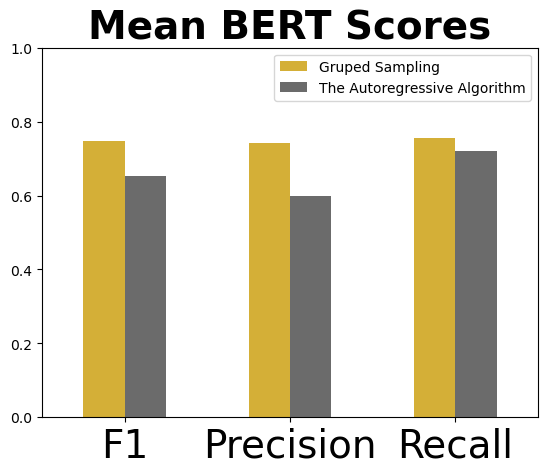

In [6]:
ax = grouped_sampling_auto_regressive_mean.plot.bar(
    rot=0,
    color=["#D4AF37", "#6B6B6B"],
    ylim=(0, 1),
)
fig = ax.get_figure()
ax.set_title("Mean BERT Scores", fontdict={"size": 28, "weight": "bold"})
ax.set_xticklabels(
    ["F1", "Precision", "Recall"],
    fontproperties={
        "size": 28,
    },
)
fig.savefig('/home/yoni/PycharmProjects/grouped_sampling/evaluation/BERT-scores-mean.svg')


# Runtime comparison

In [7]:
duration_df = pd.read_csv('/home/yoni/PycharmProjects/grouped_sampling/evaluation/group_size_to_duration.csv')
duration_df.rename({"group_size": "Group Size", "duration": "Duration in Hours"}, axis=1, inplace=True)
autoregressive_duration = duration_df["Duration in Hours"].iloc[0]
grouped_sampling_duration = duration_df["Duration in Hours"].iloc[-1]
autoregressive_duration, grouped_sampling_duration

(33.0492337468598, 0.0279524555471208)

In [8]:
PRICE_PER_HOUR = 0.53536986301  # The price of a single T4 GPU with n1-standard-4 in Google Cloud
grouped_sampling_cost = grouped_sampling_duration * PRICE_PER_HOUR
autoregressive_cost = autoregressive_duration * PRICE_PER_HOUR
grouped_sampling_cost, autoregressive_cost

(0.014964902297055178, 17.6935637436418)

/tmp/ipykernel_8758/2792959063.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


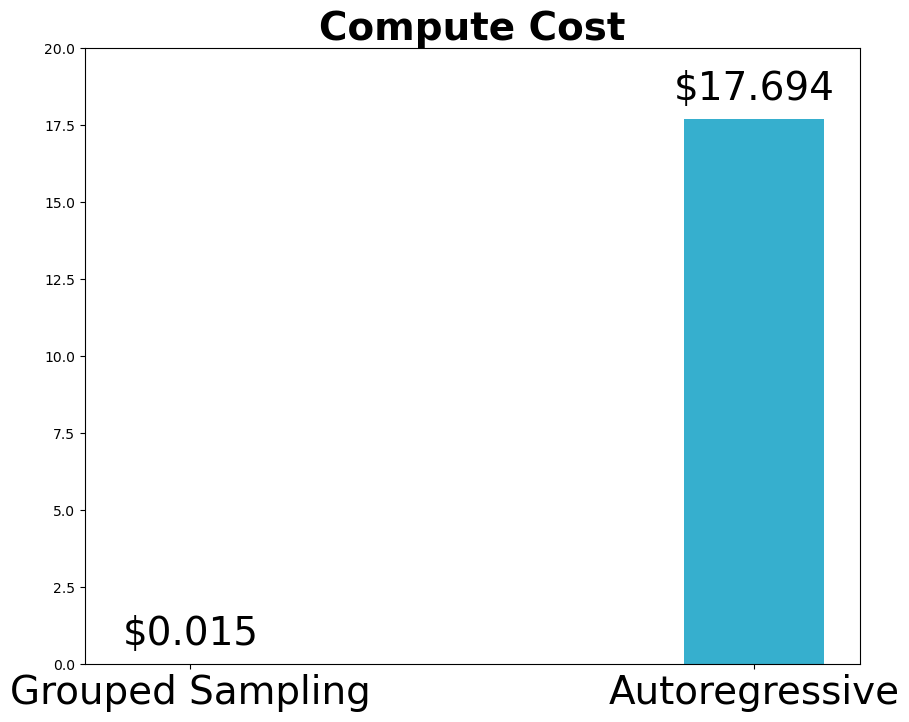

In [9]:
# create the same bar plot as the cell above but increase the size of the x labels

fig: plt.Figure
ax: plt.Axes
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylim(0, 20)
font_prop = {
    "size": 28,
    "weight": "bold",
}
ax.set_title("Compute Cost", fontdict={"size": 28, "weight": "bold"})
ax.set_xticklabels(
    ["Grouped Sampling", "Autoregressive"],
    fontproperties={
        "size": 28,
    },
)
ax.bar(
    ["GroupedSampling", "Autoregressive"],
    [grouped_sampling_cost, autoregressive_cost],
    color="#36AFCE",
    width=0.25,
    align="center",
    title="Compute Cost"
    xti
)

ax.bar_label(plt.gca().containers[0], fmt="$%.3f", padding=8, fontproperties={"size": 28},)

plt.savefig('/home/yoni/PycharmProjects/grouped_sampling/evaluation/compute_cost.png')


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (2).

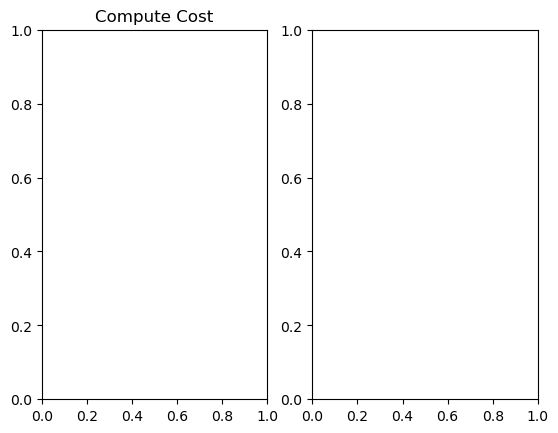

In [19]:
# both the graphs side by side
figure, axis = plt.subplots(1, 2)
axis[0].set_title("Compute Cost")
axis[0].set_xticks(axis[0].get_xticks().tolist())
costs = axis[0].bar(
    ["GroupedSampling", "Autoregressive"],
    [grouped_sampling_cost, autoregressive_cost],
    title="Compute Cost"
    ylim=(0, 20),
    color="#36AFCE",
    width=0.25,
    align="center",
)

axis[0].bar_label(costs, fmt="$%.3f", padding=8,)


axis[1] = grouped_sampling_auto_regressive_mean.plot.bar(
    color=["#D4AF37", "#6B6B6B"],
    ylim=(0, 1),
)

axis[1].set_title("Mean BERT Scores")
axis[1].set_xticklabels(
    ["F1", "Precision", "Recall"],
)